In [56]:
import os
import adddeps
from simulator.models import Client_HDF5, Client, Simulation
from matplotlib import pyplot as plt
import numpy as np
from collections import defaultdict
from simulator.settings import HDF5_PATH

In [5]:
client = Client()

In [77]:
with client.Session() as sess:
    data = dict()
    data["time"] = np.array([(f-s).total_seconds() for s,f in 
            sess.query(Simulation.start_time, Simulation.finish_time).order_by(Simulation.id.asc()).all()
        ])
    data["N"] = np.array(sess.query(Simulation.particles).order_by(Simulation.id.asc()).all())[:,0]
    data["records"] = np.array(sess.query(Simulation.iterations).order_by(Simulation.id.asc()).all())[:,0]

    data["hash"] = np.array(sess.query(Simulation.hash).order_by(Simulation.id.asc()).all())[:,0]

    data["iterations"] = (data["records"] 
        / np.array(sess.query(Simulation.dt).order_by(Simulation.id.asc()).all())[:,0]
        *np.array(sess.query(Simulation.record_interval).order_by(Simulation.id.asc()).all())[:,0])



In [78]:
set(data["iterations"])

{1000100.0, 10001000.0, 20001000.0}

In [79]:
set(np.array(sess.query(Simulation.dt).order_by(Simulation.id.asc()).all())[:,0])

{0.0001, 0.001}

In [80]:
np.array(sess.query(Simulation.record_interval).order_by(Simulation.id.asc()).all())[:,0]

array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1])

In [81]:
data["size"] = np.array(
    [os.stat(os.path.join(HDF5_PATH, _hash+".hdf5")).st_size for _hash in data["hash"]])

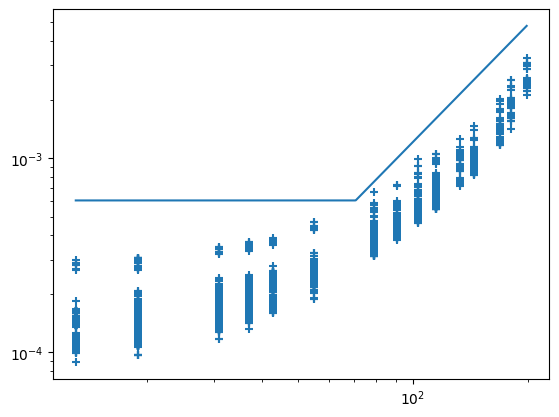

In [99]:
def f(n):
    return 1.1e-7 * np.maximum(5e3,  n**2)*1.1

plt.scatter(data["N"], data["time"]/data["iterations"],marker="+")
x=np.linspace(min(data["N"]), max(data["N"]),500)
plt.plot(x, f(x))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")

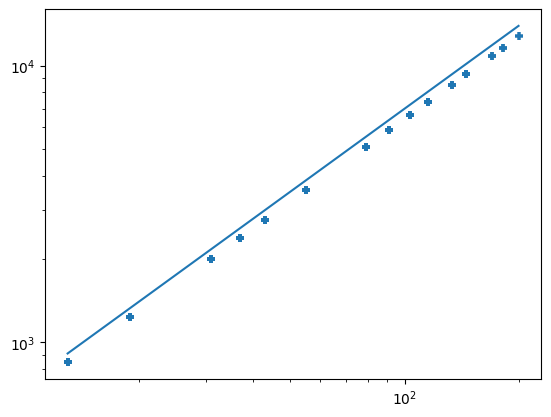

In [105]:
def f(n):
    return (70 * n)*1.0

plt.scatter(data["N"], data["size"]/data["records"],marker="+")
x=np.linspace(min(data["N"]), max(data["N"]),500)
plt.plot(x, f(x))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")

In [17]:
x.total_seconds()

50421.32185

In [15]:
len(data)

5882

In [17]:
data[1]-data[0]

TypeError: unsupported operand type(s) for -: 'Row' and 'Row'

In [13]:
data[1]-data[0]

TypeError: unsupported operand type(s) for -: 'str' and 'str'